In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ibm_df = pd.read_csv('./IBM_data_processed.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)
ibm_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## Câu hỏi: Mức thu nhập có thực sự là yếu tố quan trọng dẫn đến quyết định nghỉ việc không?

### Mục đích của câu hỏi:
- Giúp tổ chức hiểu rõ hơn về vai trò của thu nhập trong việc giữ chân nhân viên, từ đó cải thiện chính sách lương thưởng và điều kiện làm việc.
- Giúp tổ chức hiểu sâu hơn về các yếu tố ảnh hưởng đến sự gắn bó của nhân viên, từ đó xây dựng chiến lược nhân sự hiệu quả hơn.

### Các bước phân tích:
- Trung bình thu nhập theo trạng thái nghỉ việc.
- Chênh lệch về thu nhập trung bình hàng tháng giữa nhóm nhân viên đã nghỉ việc và nhóm nhân viên không nghỉ việc  theo từng vai trò công việc.
- Trung bình thu nhập hàng tháng giữa nhóm nhân viên đã nghỉ việc và nhóm nhân viên không nghỉ việc theo từng mức độ hài lòng trong công việc.

In [3]:
# Tính toán thu nhập trung bình theo trạng thái nghỉ việc
income_by_attrition = ibm_df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
income_by_attrition

,Attrition,MonthlyIncome
0,No,6832.739659
1,Yes,4787.092827


#### Chênh lệch về thu nhập trung bình hàng tháng giữa nhóm nhân viên đã nghỉ việc và nhóm nhân viên không nghỉ việc  theo từng vai trò công việc.

##### Tiền xử lý:
- Tính trung bình thu nhập hàng tháng `MonthlyIncome` cho nhóm `Attrition = "Yes"` và `Attrition = "No"`
- Tính phần trăm chênh lệch giữa hai nhóm `Attrition = "Yes"` và `Attrition = "No"`

In [4]:
# Tính trung bình MonthlyIncome cho nhóm Attrition = "Yes"
attrition_daily = (
    ibm_df[ibm_df['Attrition'] == "Yes"]
    .groupby('JobRole')['MonthlyIncome']
    .mean()
    .reset_index()
    .rename(columns={'MonthlyIncome': 'avg_attrition'})
)

# Tính trung bình MonthlyIncome cho nhóm Attrition = "No"
noattrition_daily = (
    ibm_df[ibm_df['Attrition'] == "No"]
    .groupby('JobRole')['MonthlyIncome']
    .mean()
    .reset_index()
    .rename(columns={'MonthlyIncome': 'avg_noattrition'})
)

# Kết hợp hai bảng và tính phần trăm chênh lệch
combined_df = pd.merge(attrition_daily, noattrition_daily, on='JobRole')
combined_df['pct_diff'] = round(
    ((combined_df['avg_attrition'] - combined_df['avg_noattrition']) / combined_df['avg_attrition']) * 100, 2
)
combined_df = combined_df.sort_values('pct_diff', ascending=False)

##### Trực quan hóa
Biểu đồ cột ngang (horizontal bar chart) được sử dụng để trực quan hóa sự chênh lệch về thu nhập trung bình hàng tháng giữa hai nhóm nhân viên (đã nghỉ việc và chưa nghỉ việc) theo từng vai trò công việc. Biểu đồ này biểu diễn phần trăm chênh lệch trên trục hoành và tên các vai trò công việc trên trục tung. Mỗi thanh trên biểu đồ đại diện cho một vai trò công việc, độ dài của thanh thể hiện mức độ chênh lệch về thu nhập.

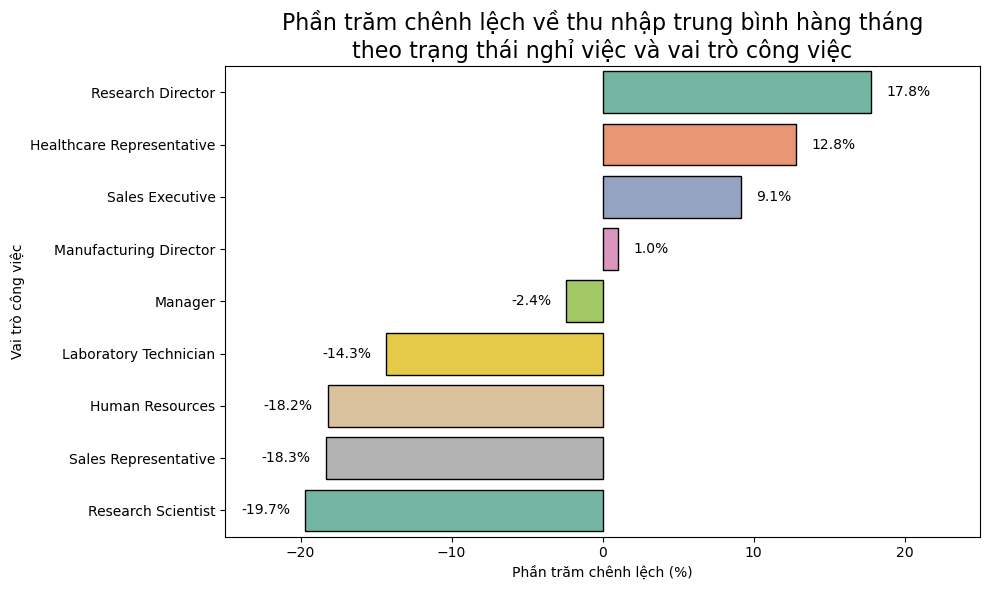

In [5]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột ngang
ax = sns.barplot(
    data=combined_df,
    x='pct_diff',
    y='JobRole',
    palette="Set2",
    orient='h',
    edgecolor='black'
)

# Ghi nhãn giá trị phần trăm
for p in ax.patches:
    width = p.get_width()
    if width >=0:
        ax.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center')
    else:
        ax.text(width - 1, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='right', va='center')

# Thêm tiêu đề và tên trục
plt.title("Phần trăm chênh lệch về thu nhập trung bình hàng tháng\ntheo trạng thái nghỉ việc và vai trò công việc", fontsize=16)
plt.xlabel("Phần trăm chênh lệch (%)")
plt.ylabel("Vai trò công việc")
plt.xlim(-25,25,5)

# Hiển thị chú thích và biểu đồ
plt.tight_layout()
plt.show()

##### Kết Luận:
- Nhóm có thu nhập cao hơn nghỉ việc nhiều hơn: Ở các vị trí Research Director (17.8%), Healthcare Representative (12.8%), và Sales Executive (9.1%), những người nghỉ việc có thu nhập trung bình cao hơn đáng kể so với những người ở lại. Điều này gợi ý rằng ở những vị trí này, các yếu tố khác ngoài thu nhập (ví dụ: cơ hội phát triển, sự công nhận, sự thăng tiến, hoặc tìm được công việc tốt hơn ở nơi khác,...) có thể đóng vai trò quan trọng hơn trong quyết định nghỉ việc.

- Nhóm có thu nhập thấp hơn nghỉ việc nhiều hơn: Ở các vị trí Research Scientist (-19.7%), Sales Representative (-18.3%), Human Resources (-18.2%), Laboratory Technician (-14.3%), và Manager (-2.4%), những người nghỉ việc có thu nhập trung bình thấp hơn so với những người ở lại. Điều này cho thấy thu nhập thấp có thể là một yếu tố quan trọng thúc đẩy quyết định nghỉ việc ở những vị trí này.

#### Trung bình thu nhập hàng tháng giữa nhóm nhân viên đã nghỉ việc và nhóm nhân viên không nghỉ việc theo từng mức độ hài lòng trong công việc
##### Tiền xử lý  
- Tính trung bình Thu nhập hàng tháng `MonthlyIncome` theo từng mức độ hài lòng trong công việc `JobSatisfaction` và trạng thái nghỉ việc `Attrition`
- Tách thành hai bảng dữ liệu con `yes_means` và `no_means` chuẩn bị cho việc vẽ biểu đồ để dễ dàng so sánh hai nhóm `Yes` và `No`

In [6]:
# Nhóm theo JobSatisfaction và Attrition, sau đó tính trung bình MonthlyIncome
income_by_satisfaction_attrition = ibm_df.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Tách dữ liệu thành "Yes" và "No"
yes_income = income_by_satisfaction_attrition[income_by_satisfaction_attrition['Attrition'] == "Yes"]
no_income = income_by_satisfaction_attrition[income_by_satisfaction_attrition['Attrition'] == "No"]

# Chuẩn bị dữ liệu cho việc vẽ biểu đồ
labels = yes_income['JobSatisfaction'].values
yes_means = yes_income['MonthlyIncome'].values
no_means = no_income['MonthlyIncome'].values

##### Trực quan hóa
Sử dụng biểu đồ cột nhóm để hiển thị mức thu nhập trung bình theo từng vai trò công việc và trạng thái nghỉ việc.

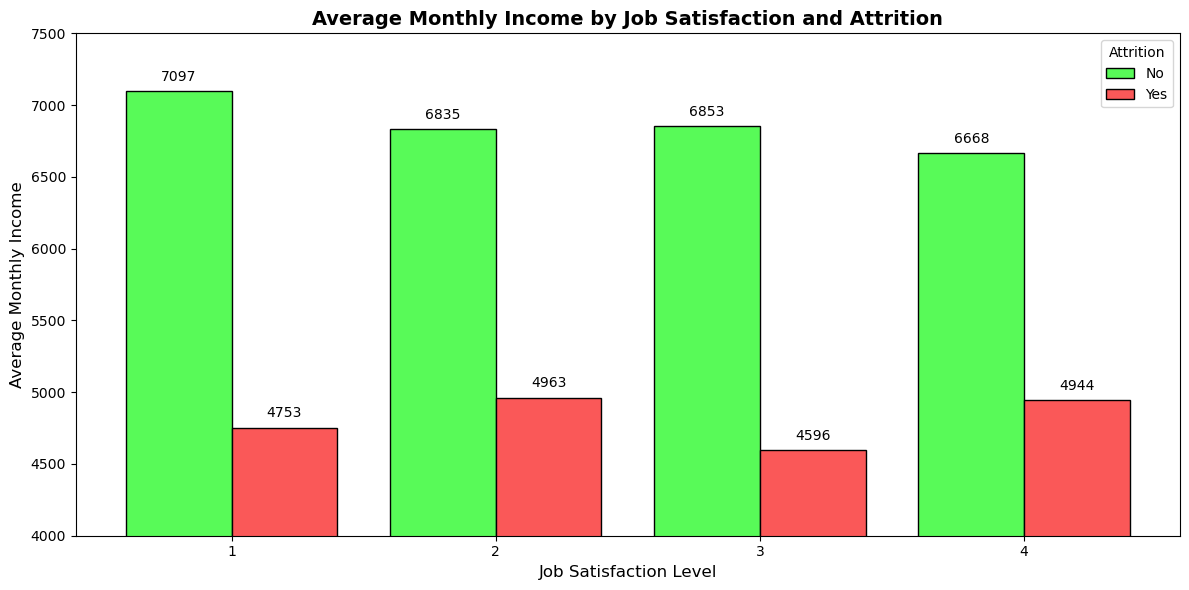

In [7]:
# Thiết lập biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ cột cho nhóm "No"
ax.bar(labels - 0.2, no_means, width=0.4, label='No', color='#58FA58', edgecolor='black')

# Vẽ cột cho nhóm "Yes"
ax.bar(labels + 0.2, yes_means, width=0.4, label='Yes', color='#FA5858', edgecolor='black')

# Thêm tiêu đề và tên trục
ax.set_title("Average Monthly Income by Job Satisfaction and Attrition", fontsize=14, weight='bold')
ax.set_xlabel("Job Satisfaction Level", fontsize=12)
ax.set_ylabel("Average Monthly Income", fontsize=12)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Thêm nhãn giá trị trên các cột
for i in range(len(labels)):
    ax.text(labels[i] - 0.2, no_means[i] + 50, f"{no_means[i]:.0f}", ha='center', va='bottom')
    ax.text(labels[i] + 0.2, yes_means[i] + 50, f"{yes_means[i]:.0f}", ha='center', va='bottom')

# Giới hạn trục y
plt.ylim(4000, 7500)

# Hiển thị chú thích và biểu đồ
ax.legend(title='Attrition')
plt.tight_layout()
plt.show()

##### Kết luận
- Thu nhập trung bình của nhóm chưa nghỉ việc luôn cao hơn nhóm đã nghỉ việc ở tất cả các mức độ hài lòng công việc. Điều này thể hiện rõ qua việc cột màu xanh (chưa nghỉ việc) luôn cao hơn cột màu cam (đã nghỉ việc) trong cùng một nhóm mức độ hài lòng từ 1 đến 4.
- Khi mức độ hài lòng công việc tăng lên, mức chênh lệch thu nhập giữa hai nhóm có xu hướng giảm xuống:
  - Mức độ hài lòng 1: Chênh lệch thu nhập lớn nhất. Nhóm chưa nghỉ việc có thu nhập trung bình cao hơn đáng kể so với nhóm đã nghỉ việc.
  - Mức độ hài lòng 2 và 3: Chênh lệch thu nhập vẫn tồn tại nhưng đã thu hẹp hơn so với mức 1.
  - Mức độ hài lòng 4: Chênh lệch thu nhập là nhỏ nhất.
- Chưa đủ cơ sở để khẳng định chắc chắn rằng thu nhập là yếu tố chính ảnh hưởng đến quyết định nghỉ việc dựa trên biểu đồ này. Mặc dù nhóm nghỉ việc luôn có thu nhập trung bình thấp hơn nhóm không nghỉ việc ở mọi mức độ hài lòng, nhưng xu hướng thay đổi thu nhập của hai nhóm theo mức độ hài lòng không cho thấy mối tương quan rõ ràng giữa thu nhập và quyết định nghỉ việc.

## Câu hỏi: Môi trường làm việc ảnh hưởng như thế nào đến tỷ lệ nghỉ việc của nhân viên trong tổ chức?

### Mục đích của câu hỏi:
- Đánh giá các tác động của môi trường làm việc đến tỷ lệ nghỉ việc của nhân viên.
- Phân tích các yếu tố trong môi trường làm việc cần cải thiện để nâng cao hiệu quả công việc.

### Các bước phân tích:
- Tỷ lệ nghỉ việc theo mức độ hài lòng về các mối quan hệ tại nơi làm việc.
- Tỷ lệ nghỉ việc theo từng vai trò công việc.
- Mức độ hài lòng với môi trường làm việc theo từng vai trò công việc

### Code

#### Tỷ lệ nghỉ việc theo mức độ hài lòng về các mối quan hệ tại nơi làm việc
##### Tiền xử lý
- Tính tỷ lệ phần trăm nghỉ việc `Attrition` theo mức độ hài lòng về các mối quan hệ tại nơi làm việc `RelationshipSatisfaction`
- Tách thành hai bảng dữ liệu con `yes_relationship` và `no_relationship` chuẩn bị cho việc vẽ biểu đồ để dễ dàng so sánh hai nhóm `Yes` và `No`

In [8]:
# Tính toán số lượng và tỷ lệ phần trăm theo Attrition và RelationshipSatisfaction
attr_relationship = ibm_df.groupby(['RelationshipSatisfaction', 'Attrition']).size().reset_index(name='amount')
attr_relationship['pct'] = attr_relationship.groupby('RelationshipSatisfaction')['amount'].apply(lambda x: round((x / x.sum()) * 100, 2))

# Tách dữ liệu thành "Yes" và "No"
yes_relationship = attr_relationship[attr_relationship['Attrition'] == "Yes"]
no_relationship = attr_relationship[attr_relationship['Attrition'] == "No"]

# Chuẩn bị dữ liệu cho việc biểu đồ
labels = yes_relationship['RelationshipSatisfaction'].values
yes_pct = yes_relationship['pct'].values
no_pct = no_relationship['pct'].values

attr_relationship

,RelationshipSatisfaction,Attrition,amount,pct
0,1,No,219,79.35
1,1,Yes,57,20.65
2,2,No,258,85.15
3,2,Yes,45,14.85
4,3,No,388,84.53
5,3,Yes,71,15.47
6,4,No,368,85.19
7,4,Yes,64,14.81


##### Trực quan hóa

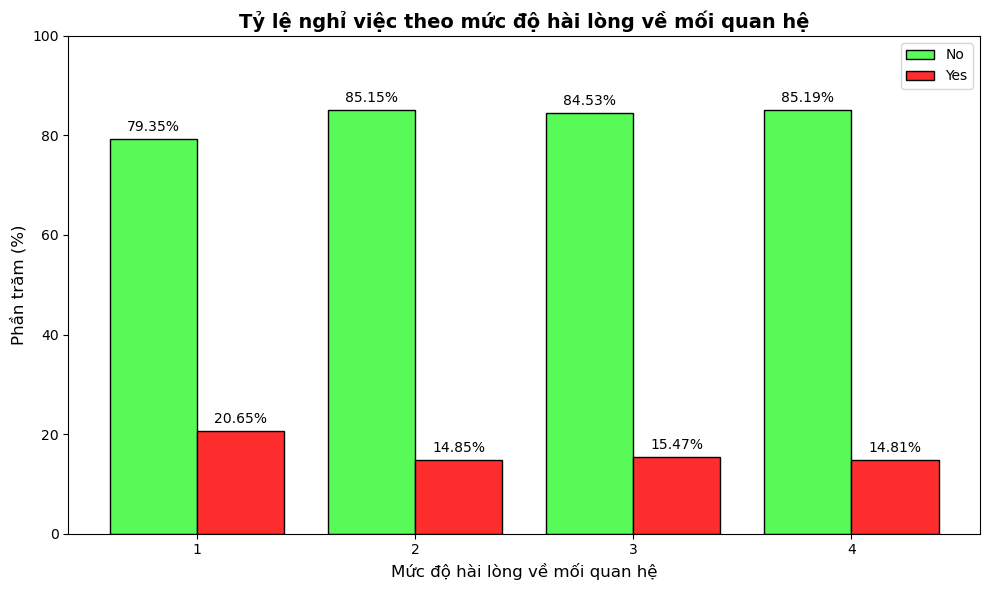

In [9]:
# Thiết lập biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho nhóm "No"
ax.bar(labels - 0.2, no_pct, width=0.4, label='No', color='#58FA58', edgecolor='black')

# Vẽ cột cho nhóm "Yes"
ax.bar(labels + 0.2, yes_pct, width=0.4, label='Yes', color='#FE2E2E', edgecolor='black')

# Thêm tiêu đề và tên trục
ax.set_title("Tỷ lệ nghỉ việc theo mức độ hài lòng về mối quan hệ", fontsize=14, weight='bold')
ax.set_xlabel("Mức độ hài lòng về mối quan hệ", fontsize=12)
ax.set_ylabel("Phần trăm (%)", fontsize=12)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Thêm nhãn giá trị trên các cột
for i in range(len(labels)):
    ax.text(labels[i] - 0.2, no_pct[i] + 1, f"{no_pct[i]}%", ha='center', va='bottom')
    ax.text(labels[i] + 0.2, yes_pct[i] + 1, f"{yes_pct[i]}%", ha='center', va='bottom')

# Giới hạn trục y
plt.ylim(0, 100)

# Hiển thị chú thích và biểu đồ
ax.legend()
plt.tight_layout()
plt.show()

##### Kết luận
Mối quan hệ tại nơi làm việc có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên, nhưng mức độ ảnh hưởng tương đối nhỏ và chủ yếu thể hiện ở nhóm có mức độ hài lòng thấp nhất. Cụ thể, tỷ lệ nghỉ việc có xu hướng giảm khi mức độ hài lòng về mối quan hệ tăng, với tỷ lệ nghỉ việc ở mức độ hài lòng thấp nhất (1) là 20.65%, cao hơn khoảng 5-6% so với các mức độ hài lòng còn lại (2, 3 và 4) - dao động quanh mức 15%. Tuy nhiên, sự chênh lệch này không quá lớn và nhóm không nghỉ việc luôn chiếm đa số (trên 79%) ở tất cả các mức độ hài lòng. Điều này cho thấy mối quan hệ tại nơi làm việc không phải là yếu tố chính quyết định đến tỷ lệ nghỉ việc.

#### Tỷ lệ nghỉ việc theo từng vai trò công việc  
##### Tiền xử lý  
- Tính tỷ lệ phần trăm nghỉ việc `Attrition` theo từng vai trò công việc `JobRole`
- Tách thành hai bảng dữ liệu con `yes_attr` và `no_attr` chuẩn bị cho việc vẽ biểu đồ để dễ dàng so sánh hai nhóm `Yes` và `No`

In [10]:
# Tính toán số lượng và tỷ lệ phần trăm theo JobRole và Attrition
attr_job = ibm_df.groupby(['JobRole', 'Attrition']).size().reset_index(name='amount')
attr_job['pct'] = attr_job.groupby('JobRole')['amount'].apply(lambda x: round((x / x.sum()) * 100, 2))

# Tách dữ liệu thành "Yes" và "No"
yes_attr = attr_job[attr_job['Attrition'] == "Yes"].sort_values('JobRole')
no_attr = attr_job[attr_job['Attrition'] == "No"].sort_values('JobRole')

# Chuẩn bị dữ liệu cho việc biểu đồ
labels = yes_attr['JobRole'].values
yes_pct = yes_attr['pct'].values
no_pct = no_attr['pct'].values

attr_job

,JobRole,Attrition,amount,pct
0,Healthcare Representative,No,122,93.13
1,Healthcare Representative,Yes,9,6.87
2,Human Resources,No,40,76.92
3,Human Resources,Yes,12,23.08
4,Laboratory Technician,No,197,76.06
5,Laboratory Technician,Yes,62,23.94
6,Manager,No,97,95.10
7,Manager,Yes,5,4.90
8,Manufacturing Director,No,135,93.10
9,Manufacturing Director,Yes,10,6.90


##### Trực quan hóa
Biểu đồ thanh ngang được sử dụng để thể hiện tỷ lệ nghỉ việc `Attrition` theo từng vai trò công việc `JobRole`. Biểu đồ này giúp so sánh trực tiếp giữa hai nhóm: nhân viên không nghỉ việc (No) và nhân viên đã nghỉ việc (Yes).

Phần trăm của nhóm không nghỉ việc được biểu diễn bên trái (với giá trị dương), trong khi phần trăm của nhóm nghỉ việc được biểu diễn bên phải (với giá trị âm, để dễ phân biệt). Trục trung tâm được đánh dấu bằng đường kẻ màu đen, giúp dễ dàng nhận ra sự cân đối hoặc chênh lệch giữa hai nhóm. Những nhãn giá trị phần trăm cũng được thêm trực tiếp lên biểu đồ, cung cấp thông tin chi tiết về mức độ chênh lệch.

Biểu đồ này không chỉ làm nổi bật vai trò công việc có tỷ lệ nghỉ việc cao mà còn hỗ trợ trong việc phân tích và định hướng các giải pháp nhằm giảm thiểu tỷ lệ nghỉ việc ở những vị trí nhạy cảm.

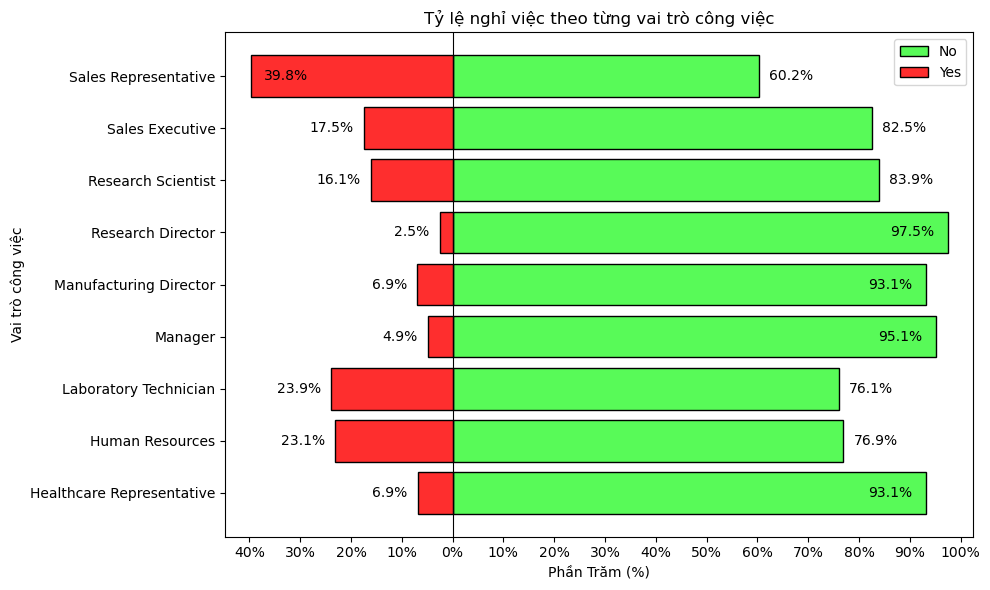

In [11]:
# Thiết lập biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Phần "No" bên phải
ax.barh(labels, no_pct, color='#58FA58', label='No', align='center', edgecolor='black')

# Phần "Yes" bên trái (đảo ngược giá trị âm để vẽ về bên trái)
ax.barh(labels, -yes_pct, color='#FE2E2E', label='Yes', align='center', edgecolor='black')

# Thêm tiêu đề và tên trục
ax.set_title("Tỷ lệ nghỉ việc theo từng vai trò công việc")
ax.set_xlabel("Phần Trăm (%)")
ax.set_ylabel("Vai trò công việc")
ax.set_xlim(-max(yes_pct) - 5, max(no_pct) + 5)
ax.set_xticks(np.arange(-40, 101, 10))
ax.set_xticklabels([f'{abs(x)}%' for x in np.arange(-40, 101, 10)])
ax.axvline(0, color='black', linewidth=0.8)

# Ghi nhãn giá trị phần trăm
for i, (yes, no) in enumerate(zip(yes_pct, no_pct)):
    if yes > 30:
        ax.text(-yes + 7, i, f"{yes:.1f}%", color="black", va="center", ha="center")
    else:
        ax.text(-yes - 2, i, f"{yes:.1f}%", color="black", va="center", ha="right")

    if no > 90:
        ax.text(no - 7, i, f"{no:.1f}%", color="black", va="center", ha="center")
    else:
        ax.text(no + 2, i, f"{no:.1f}%", color="black", va="center", ha="left")

# Hiển thị chú thích và biểu đồ
ax.legend(loc='upper right')
plt.tight_layout()
plt.show() 

#### Mức độ hài lòng với môi trường làm việc theo từng vai trò công việc

##### Tiền xử lý
Tính trung bình mức độ hài lòng với môi trường làm việc `EnvironmentSatisfaction` theo từng vai trò công việc `JobRole` và trạng thái nghỉ việc `Attrition`

In [12]:
# Tính trung bình EnvironmentSatisfaction theo JobRole và Attrition
env_attr = ibm_df.groupby(['JobRole', 'Attrition'])['EnvironmentSatisfaction'].mean().reset_index(name='avg_env')
env_attr

,JobRole,Attrition,avg_env
0,Healthcare Representative,No,2.819672
1,Healthcare Representative,Yes,2.111111
2,Human Resources,No,2.675000
3,Human Resources,Yes,2.333333
4,Laboratory Technician,No,2.822335
5,Laboratory Technician,Yes,2.387097
6,Manager,No,2.814433
7,Manager,Yes,1.800000
8,Manufacturing Director,No,2.940741
9,Manufacturing Director,Yes,2.600000


##### Trực quan hóa
Biểu đồ đường được sử dụng để thể hiện mức độ hài lòng với môi trường làm việc `EnvironmentSatisfaction` trung bình theo từng vai trò công việc `JobRole` và trạng thái nghỉ việc `Attrition`.

Mỗi vai trò công việc được biểu diễn bởi một điểm trên trục hoành, với giá trị hài lòng trung bình trên trục tung. Hai nhóm trạng thái (Yes - nghỉ việc, No - không nghỉ việc) được phân biệt bằng màu sắc: màu đỏ biểu thị nhóm nhân viên đã nghỉ việc và màu xanh lá biểu thị nhóm nhân viên vẫn còn làm việc.

Biểu đồ này giúp xác định sự khác biệt về mức độ hài lòng với môi trường giữa nhân viên nghỉ việc và nhân viên đang làm việc theo từng vai trò. Những khác biệt đáng kể có thể là dấu hiệu cho thấy môi trường làm việc có thể là yếu tố ảnh hưởng đến quyết định nghỉ việc của nhân viên ở một số vai trò cụ thể.

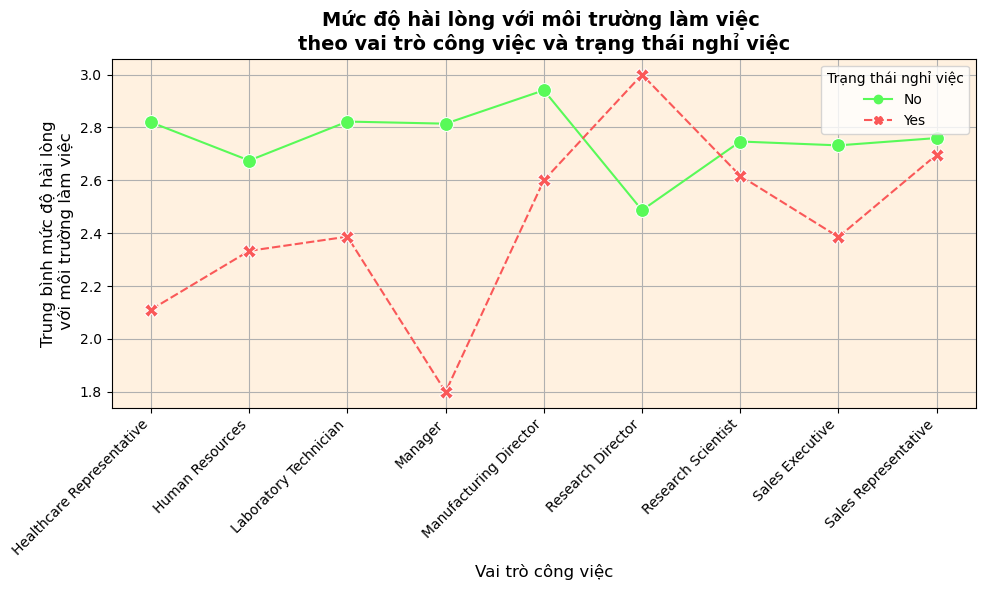

In [13]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ đường nối các điểm trung bình EnvironmentSatisfaction theo Attrition
sns.lineplot(
    data=env_attr,
    x='JobRole',
    y='avg_env',
    hue='Attrition',
    style='Attrition',
    markers=True,
    markersize=10,
    dashes=True,
    palette={"Yes": "#FA5858", "No": "#58FA58"}
)

# Thêm tiêu đề và tên trục
plt.title("Mức độ hài lòng với môi trường làm việc \ntheo vai trò công việc và trạng thái nghỉ việc", fontsize=14, weight='bold')
plt.xlabel("Vai trò công việc", fontsize=12)
plt.ylabel("Trung bình mức độ hài lòng\n với môi trường làm việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Hiển thị chú thích và biểu đồ
plt.gca().set_facecolor("#FFF1E0")
plt.legend(title="Trạng thái nghỉ việc")
plt.tight_layout()
plt.show()

##### Từ hai biểu đồ trên:
- Tác động từ vai trò công việc:
  - Biểu đồ tỷ lệ nghỉ việc theo từng vai trò công việc cho thấy sự khác biệt lớn về tỷ lệ nghỉ việc giữa các vị trí. Đặc biệt, các vai trò như Sales Representative (39.8%) và Sales Executive (17.5%) có tỷ lệ nghỉ việc cao. Đây có thể là kết quả của áp lực công việc, mức độ hài lòng thấp hoặc thiếu các chính sách giữ chân nhân viên hiệu quả. Ngược lại, các vai trò quản lý như Manager hay Manufacturing Director có tỷ lệ nghỉ việc thấp hơn (dưới 7%).
  - Điều đáng quan tâm là vị trí Human Resources, vốn có vai trò quan trọng trong quản lý nhân sự và giữ chân nhân tài, lại có tỷ lệ nghỉ việc tương đối cao (23.1%). 
  - Sự khác biệt này cho thấy các yếu tố đặc thù của từng vai trò, như tính chất công việc, điều kiện làm việc, cơ hội phát triển, có tác động trực tiếp đến quyết định nghỉ việc của nhân viên.
- Tác động từ mức độ hài lòng với môi trường làm việc:
  - Biểu đồ mức độ hài lòng với môi trường làm việc cho thấy sự tương quan đáng kể giữa mức độ hài lòng và trạng thái nghỉ việc. Nhìn chung, nhân viên không nghỉ việc có mức độ hài lòng cao hơn đáng kể so với nhóm nghỉ việc ở hầu hết các vai trò. Điển hình là vị trí Manager, nơi mà nhân viên nghỉ việc có mức hài lòng thấp nhất (1.8 trên thang 4), điều này có thể là do áp lực công việc cao.
  - Với vị trí Sales Representative và Sales Executive, mặc dù mức hài lòng của nhóm nghỉ việc (Yes) không thấp so với các vai trò khác, có thể là do họ phải làm việc và gặp gỡ khách hàng bên ngoài tổ chức, nhưng tỷ lệ nghỉ việc vẫn cao.
##### Kết luận tổng quan:
Môi trường làm việc đóng vai trò quan trọng trong việc ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên, nhưng mức độ ảnh hưởng khác nhau tùy thuộc vào vai trò công việc.